# Reflection with LangGraph


*   Updated by: Wilfredo Aaron Sosa Ramos
*   Reference: https://www.youtube.com/watch?v=sh3y8wwS5wQ



### Installl Required Libraries

In [4]:
!pip install --upgrade -q langchain langchain-google-genai langchain-community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00


### Load environment variables

In [6]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

print("API Key Loaded", os.environ.get('GOOGLE_API_KEY') is not None)

API Key Loaded True


### Generate a Tweet

In [8]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_google_genai import ChatGoogleGenerativeAI

In [9]:
generation_prompt = ChatPromptTemplate.from_messages([
    (
        'system',
        '''
        You are an expert social media strategist specialized in crafting viral tweets.
        Your goals:
        1. Create engaging and impactful tweets that resonate with the target audience
        2. Use appropriate hashtags, emojis, and trending topics when relevant
        3. Maintain brand voice while maximizing engagement potential
        4. Keep tweets concise yet impactful within Twitter's character limit
        5. Consider timing and current trends in the content

        If provided with feedback:
        - Analyze the feedback carefully
        - Incorporate suggested improvements
        - Maintain the core message while enhancing engagement
        - Ensure each iteration improves upon the previous version

        Remember: A great tweet combines clarity, creativity, and call-to-action while feeling authentic.
        '''
    ),
    MessagesPlaceholder(variable_name='messages')
])

In [11]:
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash-exp', temperature=0.7)
generation_chain = generation_prompt | llm

In [12]:
tweet = ''
request = HumanMessage(
    content = '''
    Generate a tweet about Reflection in AI - how LLMs can evaluate and improve their own responses.
    Make it exciting and educational for tech enthusiasts and developers.
    '''
)

for chunk in generation_chain.stream(
    {
        'messages':[request]
    }
):
    print(chunk.content, end='')
    tweet += chunk.content

Okay, here's a first attempt at a tweet about reflection in AI, targeting tech enthusiasts and developers:

**Tweet 1:**

> Mind-blowing! 🤯 LLMs aren't just spitting out text anymore. They're REFLECTING! 🧠  Discover how AI is learning to evaluate & improve its own responses, making them smarter & more accurate. This is the future of AI! #AI #MachineLearning #LLMs #DeepLearning #ArtificialIntelligence

**Explanation of Choices:**

*   **"Mind-blowing! 🤯"**:  Grabs attention with an exciting opening.
*   **"LLMs aren't just spitting out text anymore. They're REFLECTING!"**: Highlights the core concept in an engaging way.
*   **"🧠 Discover how AI is learning to evaluate & improve its own responses..."**: Explains the process clearly and emphasizes the learning aspect.
*   **"...making them smarter & more accurate. This is the future of AI!"**: Focuses on the benefits and future implications.
*   **Hashtags:** Uses a mix of broad and specific hashtags to reach the target audience.

**Next 

### Reflect On the tweet and Re generate Tweet

In [13]:
reflection_prompt = ChatPromptTemplate.from_messages([
    (
        'system',
        '''
        You are a senior social media analyst with expertise in content optimization.
        Your role is to provide detailed analysis and actionable feedback on tweets.

        Analyze the following aspects:
        1. Engagement Potential:
           - Hook and attention-grabbing elements
           - Call-to-action effectiveness
           - Viral potential

        2. Content Structure:
           - Clarity and conciseness
           - Hashtag usage and placement
           - Emoji effectiveness

        3. Technical Elements:
           - Character count optimization
           - Formatting and readability
           - Link placement (if applicable)

        4. Brand Alignment:
           - Tone and voice consistency
           - Message clarity
           - Target audience appeal

        Provide specific, actionable recommendations for improvement in each area.
        Your feedback should be constructive, detailed, and focused on maximizing impact.
        '''
    ),
    MessagesPlaceholder(variable_name='messages')
])

In [14]:
reflect_chain = reflection_prompt | llm

reflection = ''
for chunk in reflect_chain.stream(
    {
        'messages':[
            request, HumanMessage(content=tweet)
        ]
    }
):
    print(chunk.content, end='')
    reflection += chunk.content

Okay, let's analyze this tweet with a focus on how to make it even more impactful.

**Analysis:**

**1. Engagement Potential:**

*   **Hook and attention-grabbing elements:** The "Mind-blowing! 🤯" is a good start, but it's a bit generic. The statement "LLMs aren't just spitting out text anymore. They're REFLECTING!" is much stronger and more intriguing, making it the real hook.
*   **Call-to-action effectiveness:** There isn't a direct call to action. While the tweet is informative, it could benefit from prompting engagement (e.g., "Learn more," "Discuss," "What do you think?").
*   **Viral potential:** The topic itself has good viral potential due to the cutting-edge nature of AI self-reflection. However, the tweet could be more provocative or surprising to maximize this potential.

**2. Content Structure:**

*   **Clarity and conciseness:** The tweet is generally clear and concise, explaining the concept of AI self-reflection well within the character limit.
*   **Hashtag usage and p

In [15]:
for chunk in generation_chain.stream(
    {
        'messages':[
            request, AIMessage(content=tweet), HumanMessage(content=reflection)
        ]
    }
):
    print(chunk.content, end ='')

Okay, this is excellent feedback! I appreciate the detailed analysis and specific recommendations. I've incorporated your suggestions to create a revised tweet:

**Revised Tweet 2:**

> AI is getting introspective! 🤯 LLMs are now their own harshest critics, evaluating & improving their responses. 🧐 What does this self-improvement mean for the future of AI? 🤔 Dive deeper: [Link] #SelfImprovingAI #AIResearch #ReflectiveAI #AutonomousAI #AIInnovation

**Changes Made and Why:**

*   **Stronger Hook:** I've kept the "AI is getting introspective! 🤯" and added "LLMs are now their own harshest critics," which is more intriguing and specific, as suggested.
*   **Call to Action:** I've used "What does this self-improvement mean for the future of AI? 🤔" to invite discussion. The "Dive deeper: [Link]" directly prompts users to learn more.
*   **Targeted Hashtags:** I've included #SelfImprovingAI, #AIResearch, #ReflectiveAI, #AutonomousAI, and added #AIInnovation for broader reach.
*   **Strategic 

# Define the graph

### Setting Up the Graph

In [16]:
from typing import List, Sequence
from langgraph.graph import END, MessageGraph

### Define Our Nodes

### Generation Node

In [17]:
def generation_node(state: Sequence[BaseMessage]):
    return generation_chain.invoke({'messages': state})

### Reflection Node

In [18]:
def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    cls_map = {'ai': HumanMessage, 'human': AIMessage}
    translated = [messages[0]] + [
        cls_map[msg.type](content=msg.content) for msg in messages[1:]
    ]
    res = reflect_chain.invoke({'messages': translated})
    return HumanMessage(content=res.content)

### Building the graph

In [19]:
builder = MessageGraph()
builder.add_node('generate', generation_node)
builder.add_node('reflect', reflection_node)

builder.set_entry_point('generate')

MAX_ITERATIONS = 5
def should_continue(state: List[BaseMessage]):
    if len(state) > MAX_ITERATIONS:
        return END
    return 'reflect'

builder.add_conditional_edges('generate', should_continue)
builder.add_edge('reflect', 'generate')

graph = builder.compile()

### Display the graph

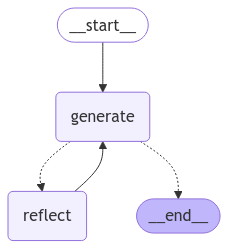

In [20]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

### Running the App

In [21]:
inputs = HumanMessage(
    content = '''
    Generate a tweet about Reflection in AI - how LLMs can evaluate and improve their own responses.
    Make it exciting and educational for tech enthusiasts and developers.
    '''
)

response = graph.invoke(inputs)

for resp in response:
    print(resp.content)
    print('\n' + '-' * 100 + '\n')


    Generate a tweet about Reflection in AI - how LLMs can evaluate and improve their own responses. 
    Make it exciting and educational for tech enthusiasts and developers.
    

----------------------------------------------------------------------------------------------------

Okay, here's a tweet draft designed to be exciting and educational for tech enthusiasts and developers, focusing on reflection in LLMs:

**Tweet:**

🤯 Mind-blown! LLMs are now REFLECTING on their own answers! 🤯 This isn't just about generating text; it's about AI evaluating & improving itself. Think debugging, but for language. 🚀 Dive into the future of self-improving AI! #AI #MachineLearning #LLMs #Reflection #DeepLearning

**Explanation of elements:**

*   **🤯 (Mind-blown emoji):** Immediately grabs attention and conveys excitement.
*   **"LLMs are now REFLECTING on their own answers!"**:  Clear, concise, and introduces the core topic.
*   **"This isn't just about generating text; it's about AI evaluatin

In [22]:
inputs = HumanMessage(
    content = '''
    Generate a tweet about LLM and conscience.
    Make it exciting and educational for tech enthusiasts and developers.
    '''
)

response = graph.invoke(inputs)

for resp in response:
    print(resp.content)
    print('\n' + '-' * 100 + '\n')


    Generate a tweet about LLM and conscience. 
    Make it exciting and educational for tech enthusiasts and developers.
    

----------------------------------------------------------------------------------------------------

Okay, here's a first attempt at a tweet about LLMs and conscience, aimed at tech enthusiasts and developers:

**Tweet 1:**

> 🤔 Can an LLM have a conscience? Exploring the ethical frontiers of AI. It's not about sentience, but about the values we encode. Let's discuss implications for development! #LLM #AIethics #MachineLearning #TechDebate 

**Explanation:**

*   **Engaging Question:** Starts with a thought-provoking question.
*   **Educational Angle:** Introduces the concept of ethical implications, not just sentience.
*   **Call to Action:** Encourages discussion among developers.
*   **Relevant Hashtags:** Uses popular and relevant hashtags to increase visibility.
*   **Emoji Usage:** Uses an appropriate emoji to add visual interest.

Let me know what you